

# Simple Linear Regression

Base on the notebook of https://www.coursera.org/learn/machine-learning-with-python/   

## Objectives
* Use scikit-learn to implement simple Linear Regression
* Create a model, train it, test it and use the model


Use of **sklearn.linear_model.LinearRegression()** - > Ordinary least squares Linear Regression.

https://vitalflux.com/ordinary-least-squares-method-concepts-examples/

### Importing Needed packages


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import os

### Reading the Data

In [3]:
current_directory = os.getcwd() 
parent_directory = os.path.abspath(os.path.join(current_directory, os.pardir))
print("Parent directory:", parent_directory)

Parent directory: d:\Github\Resources


In [4]:
#Data_directory = parent_directory + "/Data" + "/FuelConsumptionCo2.csv"
Data_directory = parent_directory + "/Data" + "/dataset_reduce_PI_MG.csv"
print(Data_directory)

d:\Github\Resources/Data/dataset_reduce_PI_MG.csv


## Reading the data in


In [5]:
df = pd.read_csv(Data_directory)

# take a look at the dataset
df.head()

,tau,theta,MVI,Deli,AcorAr,MG
0,455,181,0.999982,0.999978,4329.209163,34.101803
1,155,181,0.999983,0.999979,14369.155960,68.099895
2,505,41,0.999849,0.999848,188.722445,26.957749
3,155,181,0.999989,0.999984,14285.013080,68.099895
4,405,1,0.993893,0.993642,1.584990,39.497033


### Data Exploration
Let's first have a descriptive exploration on our data.


In [6]:
# summarize the data
df.describe()

,tau,theta,MVI,Deli,AcorAr,MG
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,368.306452,86.967742,0.997920,0.997912,2467.358021,34.892666
std,181.415350,57.229711,0.005905,0.005909,3026.719542,10.779857
min,5.000000,1.000000,0.977697,0.977693,-0.924953,26.515113
25%,205.000000,41.000000,0.999849,0.999848,222.257317,27.473215
50%,355.000000,81.000000,0.999957,0.999950,1138.662228,30.284813
75%,505.000000,141.000000,0.999974,0.999972,3633.541792,38.702308
max,655.000000,181.000000,0.999989,0.999984,14369.155960,75.425056


Let's select some features to explore more.


In [7]:
#cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf = df[['tau','theta','MVI','Deli', 'AcorAr','MG']]
cdf.head(9)

,tau,theta,MVI,Deli,AcorAr,MG
0,455,181,0.999982,0.999978,4329.209163,34.101803
1,155,181,0.999983,0.999979,14369.155960,68.099895
2,505,41,0.999849,0.999848,188.722445,26.957749
3,155,181,0.999989,0.999984,14285.013080,68.099895
4,405,1,0.993893,0.993642,1.584990,39.497033
5,155,81,0.999956,0.999955,2639.801359,39.668763
6,655,81,0.999938,0.999937,604.255478,26.515426
7,255,1,0.993800,0.993558,0.723344,37.972201
8,205,181,0.999982,0.999979,11070.028630,57.033900


We can plot each of these features:


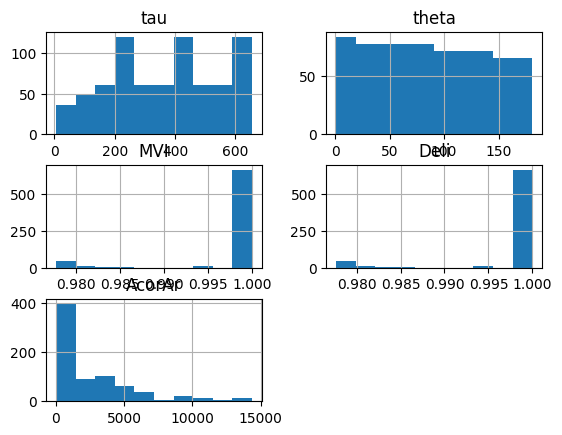

In [8]:
viz = cdf[['tau','theta','MVI','Deli', 'AcorAr']]
viz.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:


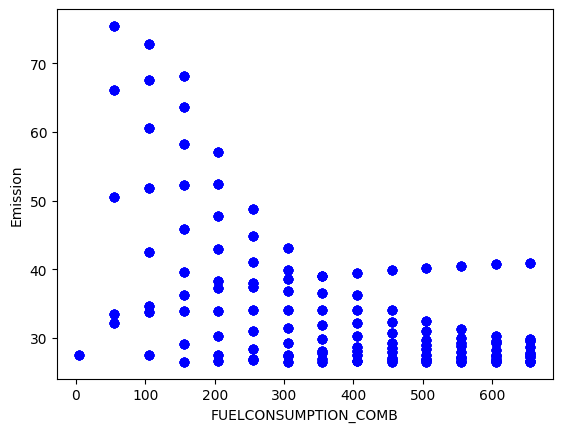

In [9]:
plt.scatter(cdf.tau, cdf.MG,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

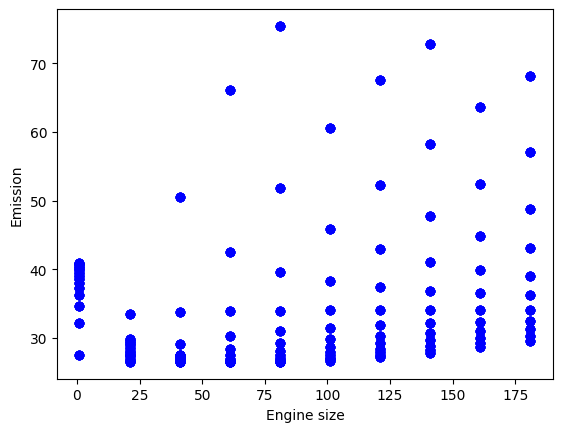

In [23]:
plt.scatter(cdf.theta, cdf.MG,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

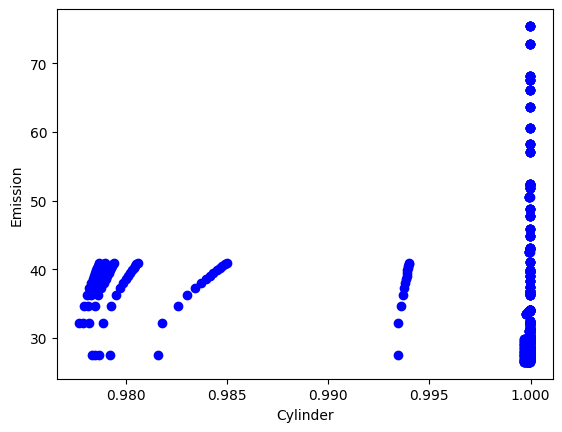

In [24]:
plt.scatter(cdf.MVI,cdf.MG,color='blue')
plt.xlabel("Cylinder")
plt.ylabel("Emission")
plt.show()




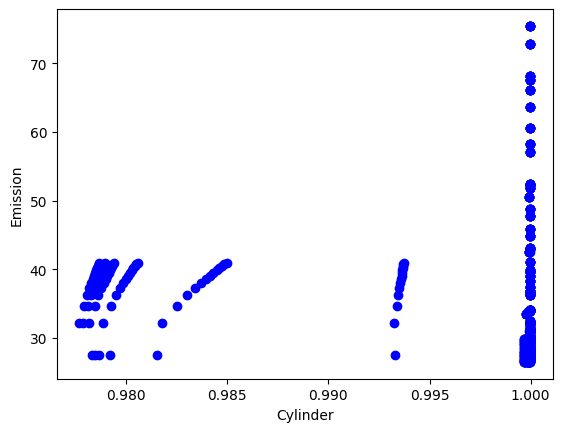

In [12]:
plt.scatter(cdf.Deli,cdf.MG,color='blue')
plt.xlabel("Cylinder")
plt.ylabel("Emission")
plt.show()


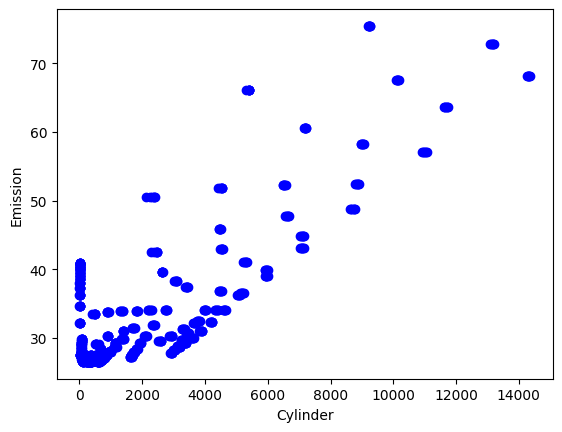

In [13]:
plt.scatter(cdf.AcorAr,cdf.MG,color='blue')
plt.xlabel("Cylinder")
plt.ylabel("Emission")
plt.show()


#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 


In [14]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation. 


#### Modeling
Using sklearn package to model data.


In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
# train_x = np.asanyarray(train[['ENGINESIZE']])
# train_y = np.asanyarray(train[['CO2EMISSIONS']])
train_x = np.asanyarray(train[['AcorAr']])
train_y = np.asanyarray(train[['MG']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.002924]]
Intercept:  [27.68542354]


As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.


#### Plot outputs


We can plot the fit line over the data:


Text(0, 0.5, 'MG')

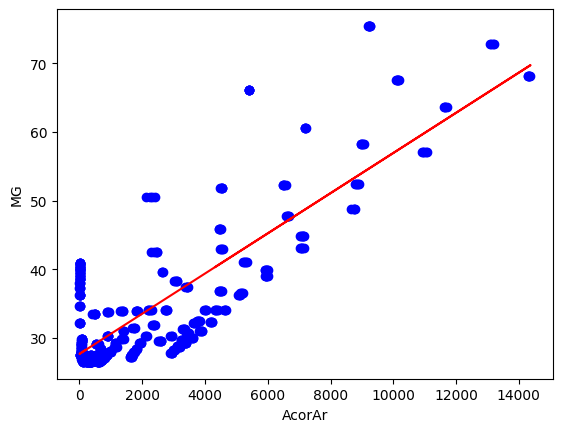

In [16]:
# plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
# plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
# plt.xlabel("Engine size")
# plt.ylabel("Emission")

plt.scatter(train.AcorAr, train.MG,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("AcorAr")
plt.ylabel("MG")

#### Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

* Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

* Root Mean Squared Error (RMSE). 

* R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [17]:
from sklearn.metrics import r2_score

# test_x = np.asanyarray(test[['ENGINESIZE']])
# test_y = np.asanyarray(test[['CO2EMISSIONS']])
# test_y_ = regr.predict(test_x)

test_x = np.asanyarray(test[['AcorAr']])
test_y = np.asanyarray(test[['MG']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 4.83
Residual sum of squares (MSE): 39.12
R2-score: 0.65


Lets see what the evaluation metrics are if we trained a regression model using the other feature.




In [22]:

# train_x = np.asanyarray(train[["FUELCONSUMPTION_COMB"]])
# test_x = np.asanyarray(test[["FUELCONSUMPTION_COMB"]])
# regr.fit(train_x, train_y)


train_x = np.asanyarray(train[["Deli"]]) # 'tau','theta','MVI','Deli', 'AcorAr','MG']
test_x = np.asanyarray(test[["Deli"]])
regr.fit(train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
predictions = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions - test_y) ** 2))
print("R2-score: %.2f" % r2_score(predictions , test_y_) )

Coefficients:  [[-133.49759863]]
Intercept:  [168.11907507]
Mean absolute error: 7.69
Residual sum of squares (MSE): 110.52
R2-score: -111.09
